<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/04_NLP%20Projects/Transfer%20Learning%20(Bert%2C%20T5%2C%20LLaMa%2C%20etc..%20(transformers)/Sentiment%20Analysis/Sentiment_Analysis_using_Vaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Summary: Sentiment Analysis on Amazon Reviews Using VADER**

##**Overview**

This project applies the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool to classify customer feedback from the Amazon Product Reviews dataset (Kaggle). After preprocessing the review text, VADER effectively categorized each review into positive, neutral, or negative sentiment, capturing both polarity and intensity with strong consistency and interpretability.


---

#**Aim of the Project**

To analyze customer opinions and detect sentiment patterns without the need for heavy model training.

To demonstrate how VADER can deliver fast, actionable sentiment insights from large review datasets.

##**Importing Libraries**

In [ ]:
import transformers
import tensorflow as tf
import torch
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")
import nltk

##**Load Dataset from Google drive**

In [ ]:
Amazon_product_reviews = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Amazon_Reviews.csv", engine="python")
Amazon_product_reviews.head()

##**Data cleaning: Confirming to know if there is null and duplicate values**

In [ ]:
print(f"Columns with num values on dataset: {Amazon_product_reviews.isna().sum()}")
print("\n")
print(f"Columns with duplicate values on dataset: {Amazon_product_reviews.duplicated().sum()}")

##**Drop null values and duplicates***

In [ ]:
Amazon_product_reviews.dropna(inplace=True)
Amazon_product_reviews.drop_duplicates(inplace=True)

In [ ]:
print(f"Columns with num values on dataset: {Amazon_product_reviews.isna().sum()}")
print("\n")
print(f"Columns with duplicate values on dataset: {Amazon_product_reviews.duplicated().sum()}")

##**Converting Rating column (str) to int**

In [ ]:
Amazon_product_reviews.Rating.value_counts()

In [ ]:
Amazon_product_reviews['Rating'] = Amazon_product_reviews['Rating'].replace({"Rated 1 out of 5 stars":1, "Rated 2 out of 5 stars":2, "Rated 3 out of 5 stars":3, "Rated 4 out of 5 stars":4, "Rated 5 out of 5 stars":5})
Amazon_product_reviews.Rating.value_counts()

##**Bar_Chart Representation**

In [ ]:

Amazon_product_reviews.Rating.value_counts().sort_index() \
.plot(kind="bar", title= "Countof reviews by stars", figsize=(10,5))
plt.xlabel("Rating Stars")
plt.ylabel("Number Of Customers")
plt.show()

##**Creating an example sample from my dataset to see what nltk does with the example**

In [ ]:
example = Amazon_product_reviews['Review Text'][50]
example

##**Tokenized sentence**

In [ ]:
nltk.download('punkt_tab')
tokens = nltk.word_tokenize(example)
tokens[:10]

##**Part of speech each word belongs too**

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')
pos = nltk.pos_tag(tokens)
pos[:5]

##** preparing model for sentiment model from nltk to analyze text**

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import tqdm
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
sia

##**Texting on example**

In [ ]:
sia.polarity_scores(example)

##**Running model on my main Text data's iterating through all** progress bar was used to monitor progress.

In [ ]:
res = {}

for i, row in tqdm(Amazon_product_reviews.iterrows(), total = len(Amazon_product_reviews)):
  text = row["Review Text"]
  names = row["Reviewer Name"]
  res[names] = sia.polarity_scores(text)

##**Merging varders result with dataframe**

In [ ]:
Vaders = pd.DataFrame(res).T
Vaders = Vaders.merge(Amazon_product_reviews, left_index=True, right_on='Reviewer Name', how="left")
Vaders[:4]

##**Bar_chart of what Vaders compound represents**

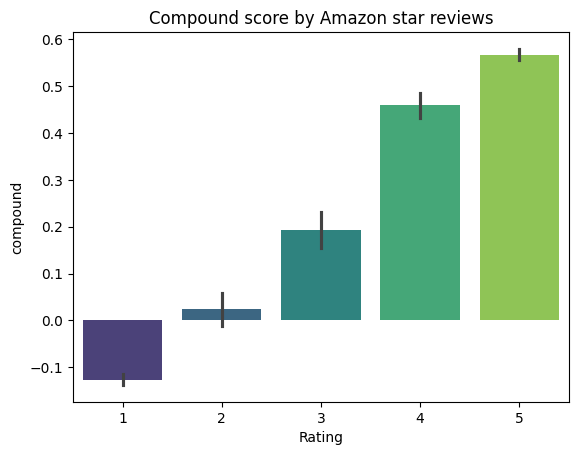



What this Means
Negative reviews has low compound score (eg: Rating 1,2,3) And Positive reviews has high compound score(eg. Rating 4,5




In [75]:
sns.barplot(data=Vaders, x="Rating", y="compound", palette="viridis")
plt.title("Compound score by Amazon star reviews")
plt.show()
print("\n")
print("What this Means")
print("Negative reviews has low compound score (eg: Rating 1,2,3) And Positive reviews has high compound score(eg. Rating 4,5")
print("\n")

##**Visualizing them by negative, neutral and positive reviews**

/tmp/ipython-input-201187859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Vaders, x="Rating", y="neg", ax = axs[0], palette="viridis")
/tmp/ipython-input-201187859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Vaders, x="Rating", y="neu", ax = axs[1], palette="plasma")
/tmp/ipython-input-201187859.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Vaders, x="Rating", y="pos", ax = axs[2], palette="magma")


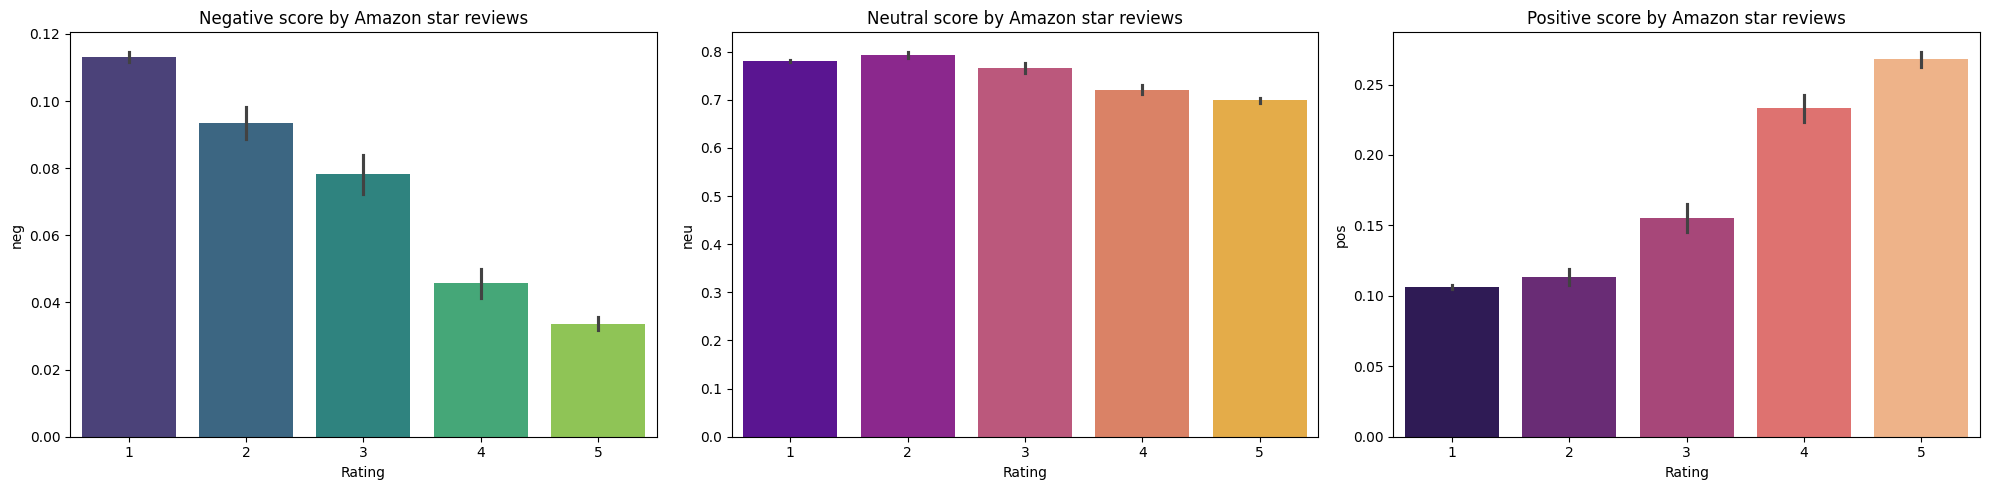

In [76]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
sns.barplot(data=Vaders, x="Rating", y="neg", ax = axs[0], palette="viridis")
sns.barplot(data=Vaders, x="Rating", y="neu", ax = axs[1], palette="plasma")
sns.barplot(data=Vaders, x="Rating", y="pos", ax = axs[2], palette="magma")
axs[0].set_title("Negative score by Amazon star reviews")
axs[1].set_title("Neutral score by Amazon star reviews")
axs[2].set_title("Positive score by Amazon star reviews")
plt.tight_layout()
plt.show()

##**As you can see Negative goes downwards, neural try to maintain its level while positive goes upward**

##**Result:** Take note Scores grater than 0.5 are positive and scores below 0.5 are either neutral or negative reviews 👍

In [77]:
Vaders_result = Vaders[["compound", "Rating", "Review Text"]]
print(Vaders_result)

       compound  Rating                                        Review Text
0        0.8432       1  I registered on the website, tried to order a ...
1       -0.7096       1  Had multiple orders one turned up and driver h...
2       -0.9276       1  I informed these reprobates that I WOULD NOT B...
3       -0.8947       1  I have bought from Amazon before and no proble...
4       -0.7327       1  If I could give a lower rate I would! I cancel...
...         ...     ...                                                ...
21209    0.8908       5  I have had perfect order fulfillment, and fast...
21210    0.9258       5  I have had perfect order fulfillment, and fast...
21211    0.2362       3  I always find myself going back to amazon beco...
21212    0.9184       5  I have placed an abundance of orders with Amaz...
21213    0.4404       4  those goods i've ordered by Amazon.com, have b...

[20946 rows x 3 columns]


#**Conclusion**

When deployed, this sentiment analysis system can:

Automatically score customer reviews and label their sentiment in real time.

Support e-commerce platforms, product analytics dashboards, and customer feedback systems.

Help businesses monitor brand perception, detect dissatisfaction, and understand user experiences at scale.


The project highlights VADER as a lightweight but powerful tool for sentiment interpretation in real-world review data.
